This code is written by Woohynu Eum, woohyun.eum@ufl.edu
Reference of this code is https://github.com/manandesai/CNN-dementia-classifier/blob/main/source_code.py

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')
from skimage.io import imread
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#  Reasing dataset

In [2]:
train_set = tf.keras.utils.image_dataset_from_directory("./dataset/train",
                                                            validation_split = 0.2,
                                                            subset = 'training',
                                                            seed = 50,
                                                            image_size = (208, 176),
                                                            batch_size = 10)
validation_set = tf.keras.utils.image_dataset_from_directory("./dataset/train",
                                                            validation_split = 0.2,
                                                            subset = 'validation',
                                                            seed = 50,
                                                            image_size = (208, 176),
                                                            batch_size = 10)
test_set = tf.keras.utils.image_dataset_from_directory("./dataset/test",
                                                            seed = 50,
                                                            image_size = (208, 176),
                                                            batch_size = 10)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


In [3]:
# Set the class names

class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
train_set.class_names = class_names
test_set.class_names = class_names
validation_set.class_names = class_names

In [4]:
# One-Hot encode the target (labels)

def one_hot_label(image, label):
    label = tf.one_hot(label, 4)
    return image, label

In [5]:
train_ds = train_set.map(one_hot_label)
validation_ds = validation_set.map(one_hot_label)
test_ds = test_set.map(one_hot_label)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Designing the CNN classifier

In [ ]:
classifier= Sequential([Conv2D(16, kernel_size=3, padding='valid', activation='relu', input_shape=(208,176,3)),
                        MaxPool2D(pool_size = (2,2)),
                        Conv2D(32, kernel_size=3, padding='valid', activation='relu'),
                        MaxPool2D(pool_size = (2,2)),
                        Conv2D(64, kernel_size=3, padding='valid', activation='relu'),
                        MaxPool2D(pool_size = (2,2)),
                        Flatten(),
                        Dense(128, activation='relu'),
                        Dropout(.5),
                        Dense(64, activation='relu'),
                        Dropout(.5),
                        Dense(4, activation='softmax')])


In [ ]:
classifier.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics =['AUC', 'accuracy', 'CategoricalAccuracy'])
checkpoint_cb = ModelCheckpoint("checkpoint_model_first.h5", save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)
classifier.summary()

In [ ]:
# Train the CNN

history = classifier.fit_generator(train_ds, epochs = 30, validation_data= validation_ds, callbacks=[es])


In [ ]:
# Evaluate the CNN on the test data

classifier.evaluate(test_ds)

In [ ]:
f_m=classifier
f_m.summary()
f_m.save_weights('./checkpoints/')

In [ ]:
# Plot the accuracy and the loss curves
epochs = range(0,30)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs = range(1, len(auc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:

# Evaluate model and build confusion matrix

test_results_tl = classifier.evaluate(x=test_ds, y=test_ds)

pred_test_tl = model_tl.predict(test_x_3c, verbose = 1)
pred_test_tl = onehot.inverse_transform(pred_test_tl)

real_val = onehot.inverse_transform(test_y)
cm_tl = confusion_matrix(real_val, pred_test_tl, labels=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df = pd.DataFrame(cm_tl, columns=['ND', 'VMILD', 'MILD', 'MOD'], index=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df.columns.name = 'Predicted'
cm_tl_df.index.name = 'Actual'
sns.heatmap(cm_tl_df, annot=True, fmt='g', cmap='Greens')

# Re-split the data

In [6]:

# Read in all data again

train_nd_dir = 'dataset/train/NonDemented/'
train_vmild_dir = 'dataset/train/VeryMildDemented/'
train_mild_dir = 'dataset/train/MildDemented/'
train_mod_dir = 'dataset/train/ModerateDemented/'
test_nd_dir = 'dataset/test/NonDemented/'
test_vmild_dir = 'dataset/test/VeryMildDemented/'
test_mild_dir = 'dataset/test/MildDemented/'
test_mod_dir = 'dataset/test/ModerateDemented/'

In [7]:

train_x = []
train_y = []
test_x = []
test_y = []


In [8]:
for image_path in os.listdir(train_nd_dir):
  img = imread(train_nd_dir + image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  train_x.append(img)
  train_y.append('ND')
  
for image_path in os.listdir(train_vmild_dir):
  img = imread(train_vmild_dir+image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  train_x.append(img)
  train_y.append('VMILD')

for image_path in os.listdir(train_mild_dir):
  img = imread(train_mild_dir+image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  train_x.append(img)
  train_y.append('MILD')

for image_path in os.listdir(train_mod_dir):
  img = imread(train_mod_dir+image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  train_x.append(img)
  train_y.append('MOD')

for image_path in os.listdir(test_nd_dir):
  img = imread(test_nd_dir+image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  test_x.append(img)
  test_y.append('ND')
  
for image_path in os.listdir(test_vmild_dir):
  img = imread(test_vmild_dir+image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  test_x.append(img)
  test_y.append('VMILD')

for image_path in os.listdir(test_mild_dir):
  img = imread(test_mild_dir+image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  test_x.append(img)
  test_y.append('MILD')

for image_path in os.listdir(test_mod_dir):
  img = imread(test_mod_dir+image_path, as_gray=True)
  img = img.astype('float32')
  img /= 255.0
  test_x.append(img)
  test_y.append('MOD')

In [9]:
# Combine all data into one large dataset and one-hot encode labels

train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)


In [10]:
full_x = np.concatenate((train_x,test_x),axis=0)
full_y=np.concatenate((train_y,test_y),axis=0)
onehot = LabelBinarizer()
full_y = onehot.fit_transform(full_y)

In [11]:
# Re-split training and testing data
# then split training into training and validation

train_x, test_x, train_y, test_y = train_test_split(full_x, full_y, test_size = 0.2, shuffle=True, random_state=33)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2, shuffle=True, random_state=33)
train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape
train_x = np.array(train_x).reshape(4096,208,176,1)
val_x = np.array(val_x).reshape(1024,208,176,1)
test_x = np.array(test_x).reshape(1280,208,176,1)

# First model: Transfer learning

In [ ]:
##########################################################################
# We set up a transfer learning model using Resnet101
##########################################################################

# Prepare data for input into Resnet101

train_x_tmp = np.array(train_x).reshape(4096,208,176)
val_x_tmp = np.array(val_x).reshape(1024,208,176)
test_x_tmp = np.array(test_x).reshape(1280,208,176)

In [ ]:

print(train_x_tmp.shape)
train_x_3c = np.repeat(train_x_tmp[..., np.newaxis], 3, -1)
print(train_x_3c.shape) 
print(val_x_tmp.shape)
val_x_3c = np.repeat(val_x_tmp[..., np.newaxis], 3, -1)
print(val_x_3c.shape)  
print(test_x_tmp.shape)
test_x_3c = np.repeat(test_x_tmp[..., np.newaxis], 3, -1)
print(test_x_3c.shape)  


In [ ]:
# Bring in Resnet101 and freezing excapt the final layer
# Add more trainable layers

pretrained_model = tf.keras.applications.ResNet101(include_top=False, input_shape=(208,176,3))
pretrained_model.trainable = False


In [ ]:
model_tl = keras.Sequential([
    pretrained_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')
])

In [ ]:
# Compiling and fitting transfer learning model

model_tl.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(),metrics=['AUC','accuracy','categorical_accuracy'])
checkpoint_tl = ModelCheckpoint("checkpoint_model_tl.h5", save_best_only=True)
es_tl = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

In [ ]:
history_tl = model_tl.fit(train_x_3c, train_y, validation_data=(val_x_3c, val_y), batch_size=10, epochs = 1, callbacks=[es_tl, checkpoint_tl])


In [ ]:
# Plot accuracy and loss curves

plt.plot(history_tl.history['categorical_accuracy'], label="Training Accuracy")
plt.plot(history_tl.history['val_categorical_accuracy'], label="Validation Accuracy")
plt.legend(loc="best")
plt.show()
plt.plot(history_tl.history['loss'], label="Training Loss")
plt.plot(history_tl.history['val_loss'], label="Validation Loss")
plt.legend(loc="best")
plt.show()

In [ ]:

# Evaluate model and build confusion matrix

test_results_tl = model_tl.evaluate(x=test_x_3c, y=test_y)

pred_test_tl = model_tl.predict(test_x_3c, verbose = 1)
pred_test_tl = onehot.inverse_transform(pred_test_tl)

real_val = onehot.inverse_transform(test_y)
cm_tl = confusion_matrix(real_val, pred_test_tl, labels=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df = pd.DataFrame(cm_tl, columns=['ND', 'VMILD', 'MILD', 'MOD'], index=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df.columns.name = 'Predicted'
cm_tl_df.index.name = 'Actual'
sns.heatmap(cm_tl_df, annot=True, fmt='g', cmap='Greens')

In [ ]:
classifier.summary()

# Second model: Designing CNN from scratch

In [110]:
# Create CNN

classifier = Sequential()
classifier.add(Conv2D(1, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(208,176,1)))
classifier.add(Conv2D(64, (5,5), strides=(2,2), padding='valid', activation='relu', input_shape=(208,176,1)))
classifier.add(MaxPooling2D(2))
classifier.add(Conv2D(128, (5,5), strides=(2,2), padding='valid', activation='relu'))
classifier.add(Conv2D(256, (5,5), strides=(2,2), padding='valid', activation='relu'))
classifier.add(MaxPooling2D(2))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(4, activation='softmax'))
classifier.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(),metrics=['AUC','accuracy','categorical_accuracy'])
checkpoint_cb = ModelCheckpoint("checkpoint_model_change.h5", save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 208, 176, 1)       10        
                                                                 
 conv2d_13 (Conv2D)          (None, 102, 86, 64)       1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 51, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 20, 128)       204928    
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 8, 256)        819456    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 4, 256)        0         
 2D)                                                  

In [108]:
# Define the Gradient Fucntion
epoch_gradient = []

def get_gradient_func(model):
    grads = keras.backend.gradients(model.total_loss, model.trainable_weights)
    # grads = K.gradients(model.loss, model.trainable_weights)
    # inputs = model.model.inputs + model.targets + model.sample_weights
    # use below line of code if above line doesn't work for you
    # inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = keras.backend.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([test_images, test_labels, np.ones(len(test_labels))])
      epoch_gradient.append(grads)

In [111]:
# Fit CNN

history = classifier.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=30, epochs = 30, callbacks=[es, checkpoint_cb,GradientCalcCallback()])


Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
137/137 [==============================] - ETA: 0s - loss: 1.1401 - auc: 0.7563 - accuracy: 0.4688 - categorical_accuracy: 0.4688WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020627759D08> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 

AttributeError: 'Sequential' object has no attribute 'total_loss'

In [ ]:
# Plot accuracy and loss curves

plt.plot(history.history['categorical_accuracy'], label="Training Accuracy")
plt.plot(history.history['val_categorical_accuracy'], label="Validation Accuracy")
plt.legend(loc="best")
plt.show()
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend(loc="best")
plt.show()

In [ ]:
# Evaluate on test set and create confusion matrix

test_results = classifier.evaluate(x=test_x, y=test_y)

pred_test = classifier.predict(test_x, verbose = 1)
pred_test = onehot.inverse_transform(pred_test)
real_val = onehot.inverse_transform(test_y)

cm = confusion_matrix(real_val, pred_test, labels=['ND', 'VMILD', 'MILD', 'MOD'])
cm_df = pd.DataFrame(cm, columns=['ND', 'VMILD', 'MILD', 'MOD'], index=['ND', 'VMILD', 'MILD', 'MOD'])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Greens')

# Experiment with different threshold values

In [12]:
# load in the model checkpoint from the final CNN model

model = keras.models.load_model('checkpoint_model.h5')
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics =['AUC','acc'])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
40/40 [==============================] - 3s 84ms/step


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

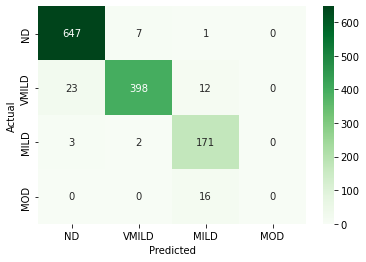

In [15]:
# Recreate confusion matrix with standard classification rules
# i.e. predict class with highest probability

pred_test = model.predict(x=test_x)
pred_test = model.predict(test_x, verbose = 1)
pred_test = onehot.inverse_transform(pred_test)
real_val = onehot.inverse_transform(test_y)
real_val = onehot.inverse_transform(test_y)
cm_tl = confusion_matrix(real_val, pred_test, labels=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df = pd.DataFrame(cm_tl, columns=['ND', 'VMILD', 'MILD', 'MOD'], index=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df.columns.name = 'Predicted'
cm_tl_df.index.name = 'Actual'
sns.heatmap(cm_tl_df, annot=True, fmt='g', cmap='Greens')


In [17]:

pred_prob=model.predict([test_x])
predict_classes=np.argmax(pred_prob,axis=1)
#pred_prob = model.predict_proba(test_x)
predictions=[]
classes=['MILD','MOD','ND','VMILD']
for probs in pred_prob:
  inds = np.argsort(probs)
  if inds[len(inds)-1] != 2:
    predictions.append(classes[inds[len(inds)-1]])
  else:
    index_top = inds[len(inds)-1]
    index_second = inds[len(inds)-2]
    if probs[index_top] - probs[index_second] < 0.9:
      predictions.append(classes[inds[len(inds)-2]])
    else:
      predictions.append(classes[inds[len(inds)-1]])


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

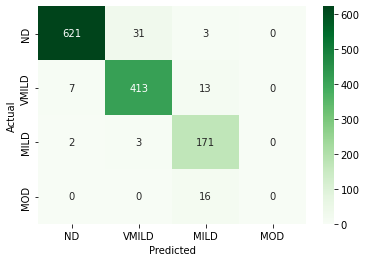

In [18]:
# show new confusion matrix

real_val = onehot.inverse_transform(test_y)
cm_tl = confusion_matrix(real_val, predictions, labels=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df = pd.DataFrame(cm_tl, columns=['ND', 'VMILD', 'MILD', 'MOD'], index=['ND', 'VMILD', 'MILD', 'MOD'])
cm_tl_df.columns.name = 'Predicted'
cm_tl_df.index.name = 'Actual'
sns.heatmap(cm_tl_df, annot=True, fmt='g', cmap='Greens')

In [19]:
# Prepare data for visualizing activation

train_x_tmp = np.array(train_x).reshape(4096,208,176)
val_x_tmp = np.array(val_x).reshape(1024,208,176)
test_x_tmp = np.array(test_x).reshape(1280,208,176)

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_x_tmp[0].reshape(1,208,176,1))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Displaying activated feature map & heat map

In [13]:

# Define function to display activation layer

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [56]:
def display_activation2(activations, col_size, row_size, act_index,idx): 
    activation = activations[act_index]
    act2=activations[idx]
    activation_index=0
    activations[0, :,:,1].shape


In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 102, 86, 64)       1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 51, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 20, 128)       204928    
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 8, 256)        819456    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 4, 256)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5120)             

In [78]:
len(activations)

11

In [92]:
activations[0].shape

(1, 102, 86, 64)

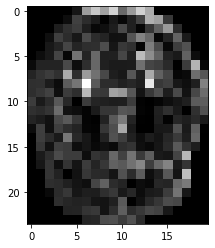

In [107]:
temp=np.mean(activations[2], axis=3)
plt.imshow(temp[0],cmap='gray')

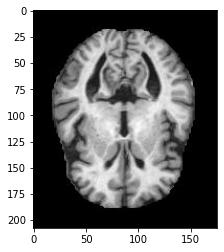

In [21]:
# Visualize randomly selected image

plt.imshow(train_x[0][:,:,0], cmap='gray')

In [90]:
train_x[0].shape

(208, 176, 1)

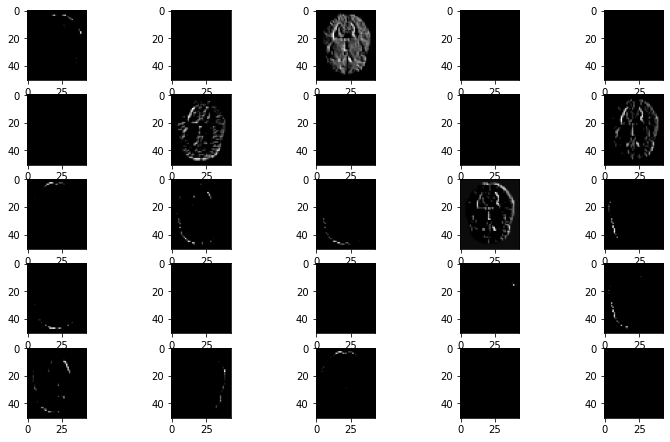

In [36]:
# Display activations for each of the three convolutional layers
# Will display in 8x8 grid but this can be changed

display_activation(activations, 5, 5, 1)



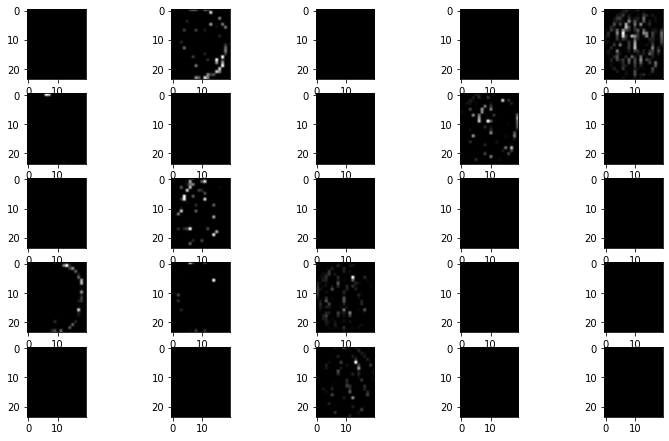

In [74]:
# Display activations for each of the three convolutional layers
# Will display in 8x8 grid but this can be changed

display_activation(activations, 5, 5, 2)



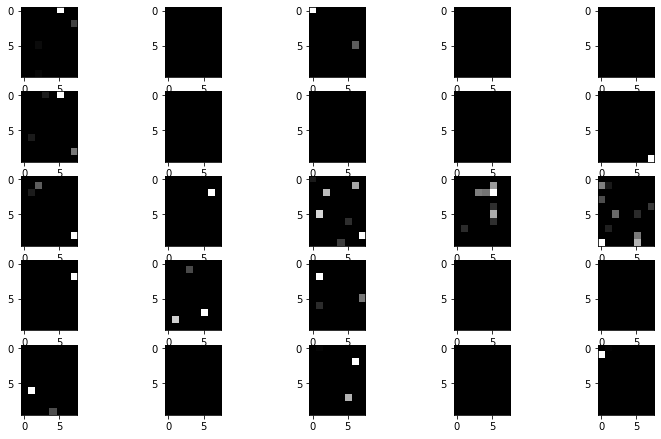

In [75]:

display_activation(activations, 5, 5, 3)


In [143]:
# Define function to show heatmap of image.
# Sections of the image that are more important will be shown with a red overlay
# on top of the actual image
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
        
    
def show_heatmap(file_path):
    output=[]
    img = imread(file_path, as_gray=True)
    #cv2.imshow('input', cv2.imread(file_path)) # Visualize image
    plt.imshow(img)
    plt.show()
    img = img.astype('float32')
    img /= 255
    x = image.img_to_array(img)
    x=np.reshape(x, (1,208, 176, 1))
    preds = model.predict(x)
    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('conv2d_5')
        iterate = Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = keras.backend.mean(grads, axis=(0, 1, 2))
  
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads+0.01, last_conv_layer), axis=-1)
    
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = heatmap.reshape((10, 8))
    plt.matshow(heatmap)
    plt.show()

    
    INTENSITY = 0.2
    heatmap = cv2.resize(heatmap, (x.shape[2], x.shape[1]))
    heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    color_img = cv2.cvtColor(x[0],cv2.COLOR_GRAY2RGB)
    img = heatmap * INTENSITY + color_img

    plt.imshow(img)
    plt.show()
    output.append(img)
    return output


In [22]:
path='./dataset/train/ModerateDemented/'
list=os.listdir(path)

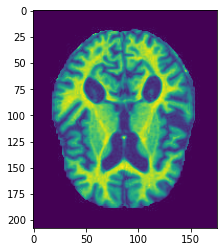

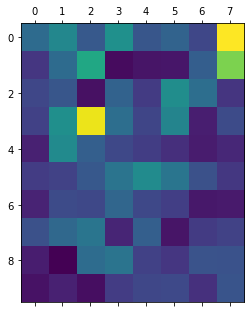

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


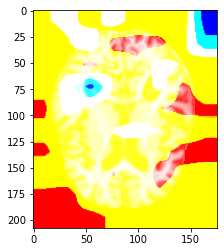

In [136]:
n_path=os.path.join(path+list[10])
show_heatmap(n_path)

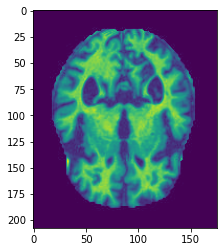

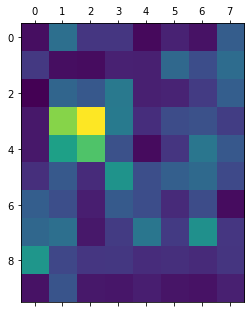

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


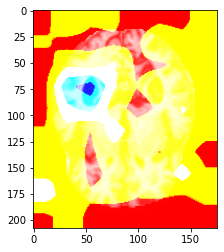

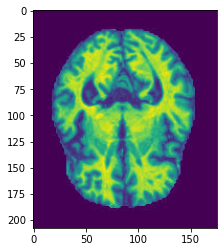

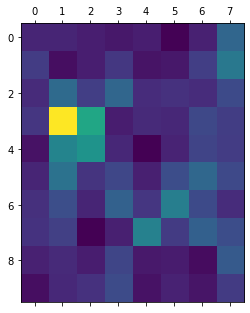

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


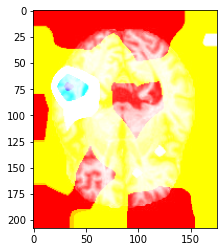

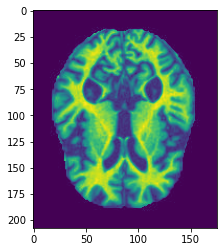

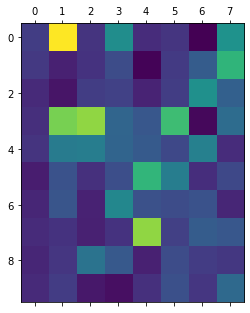

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


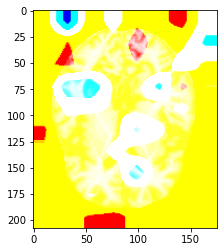

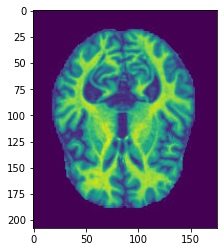

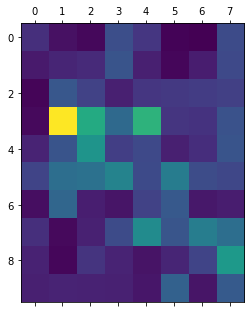

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


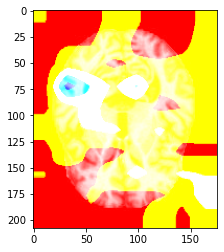

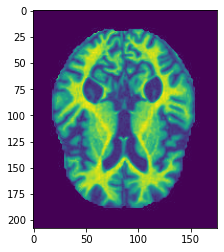

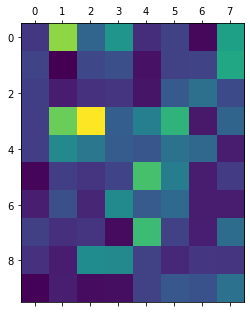

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


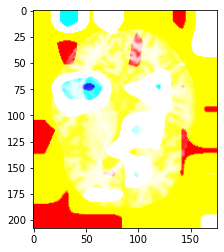

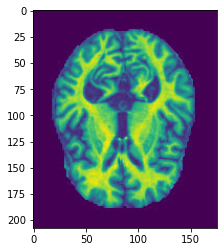

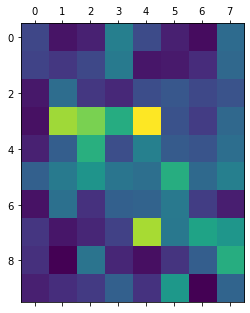

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


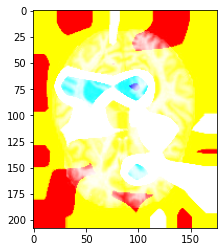

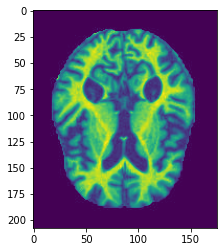

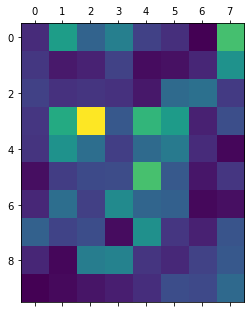

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


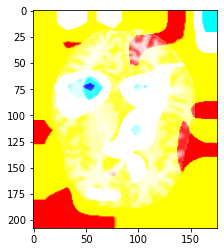

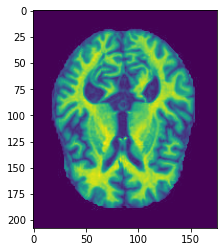

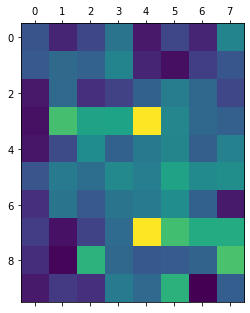

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


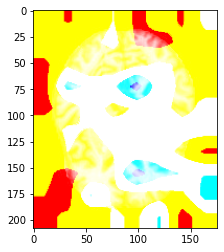

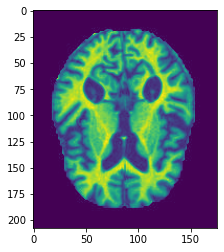

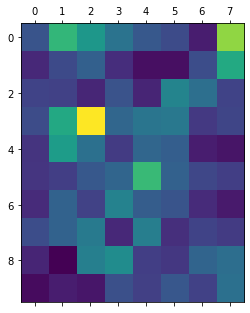

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


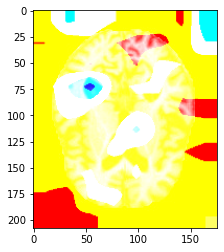

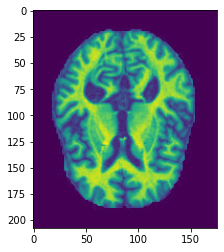

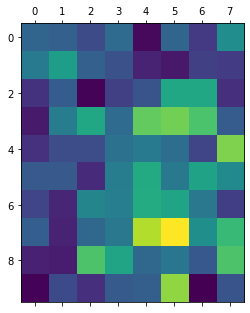

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


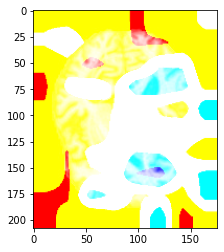

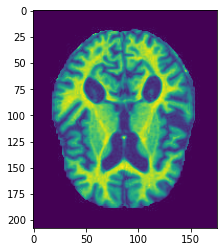

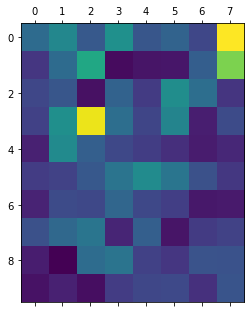

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


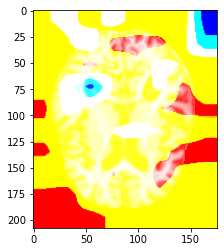

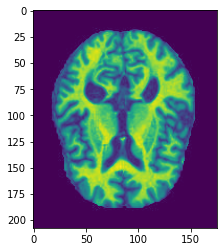

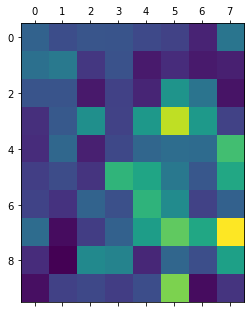

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


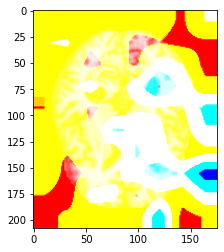

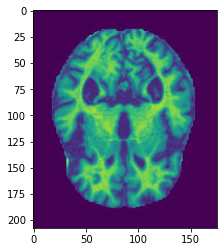

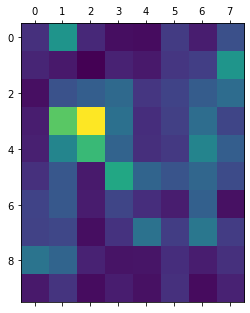

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


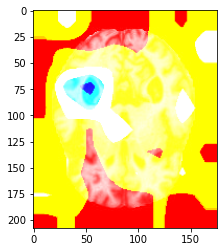

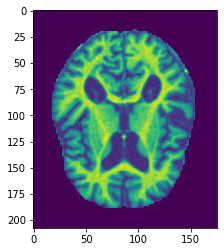

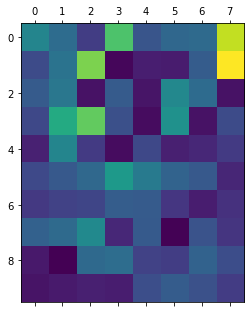

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


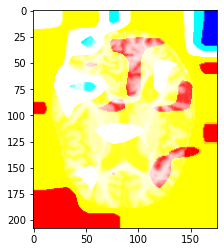

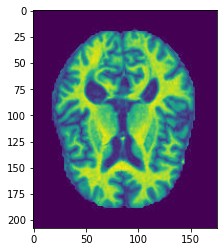

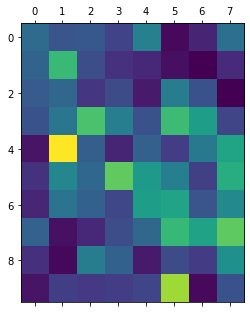

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


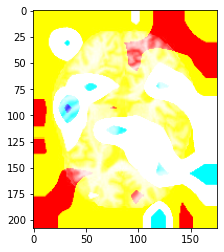

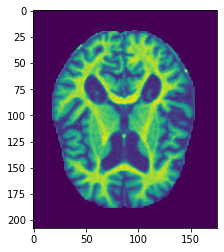

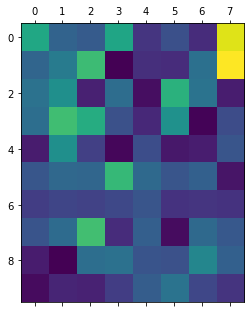

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


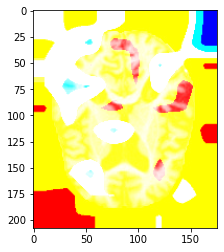

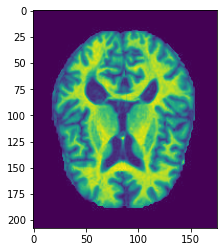

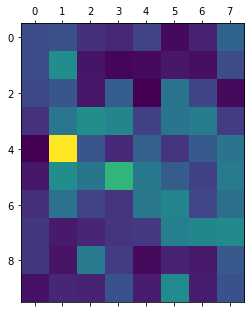

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


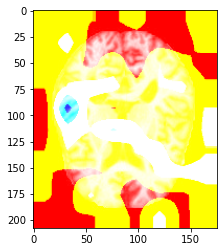

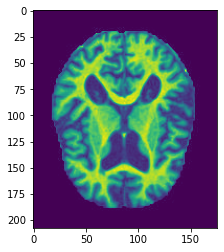

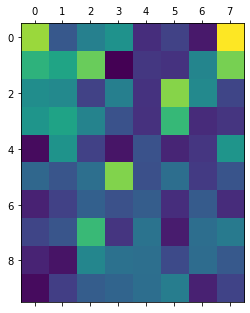

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


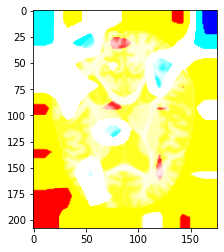

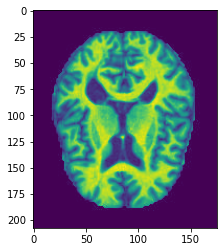

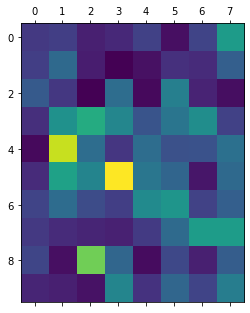

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


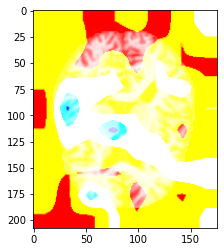

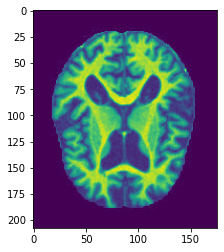

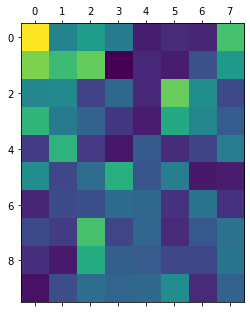

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


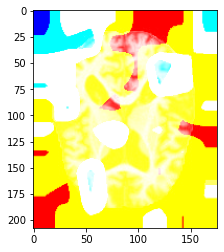

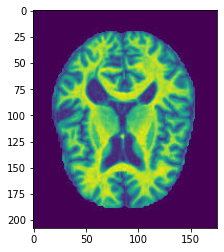

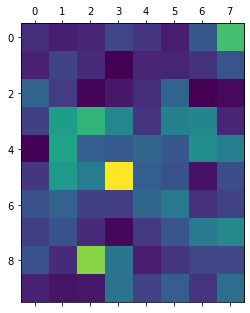

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


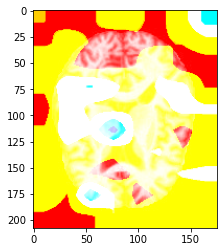

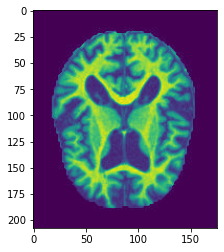

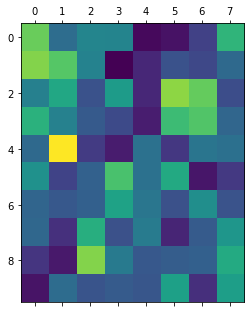

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


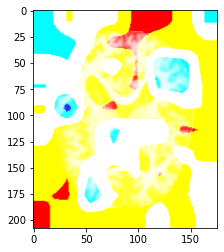

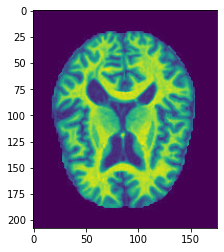

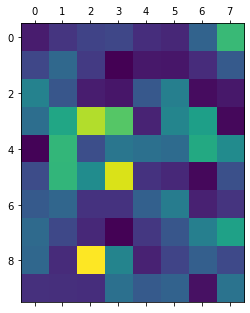

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


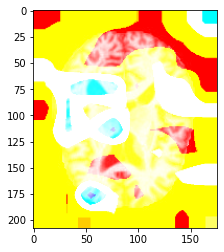

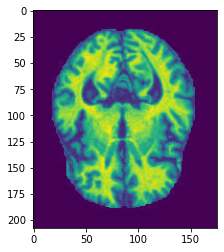

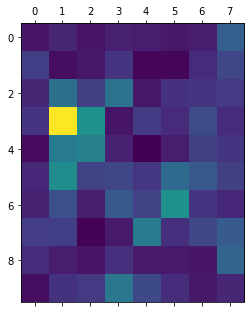

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


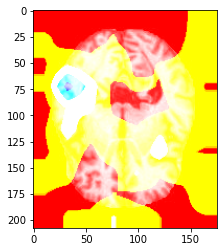

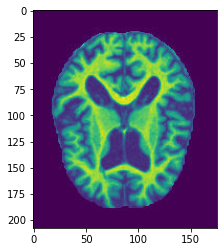

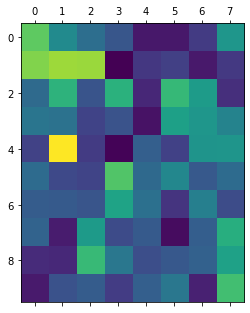

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


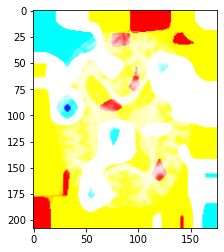

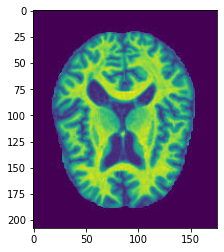

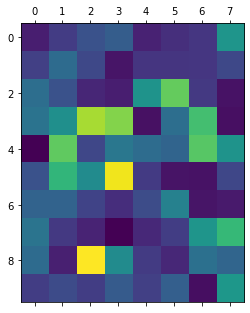

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


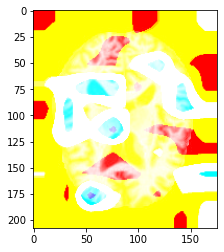

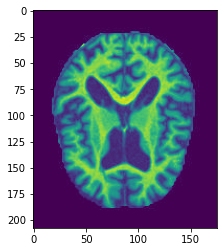

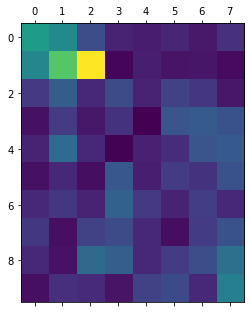

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


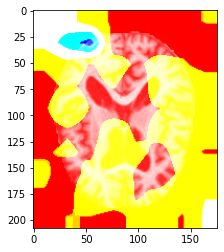

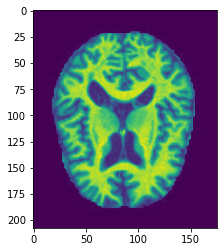

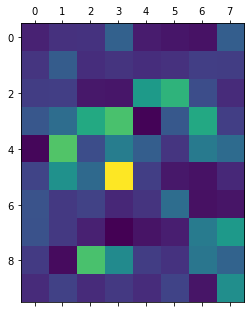

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


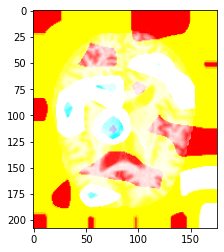

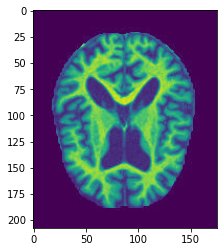

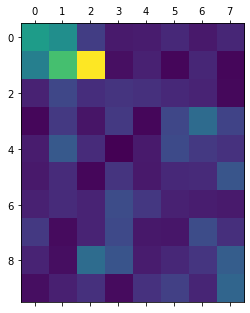

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


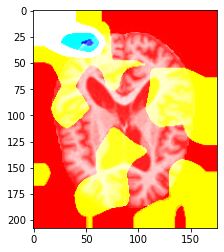

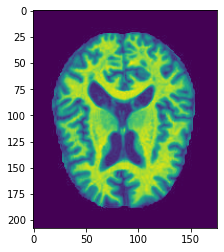

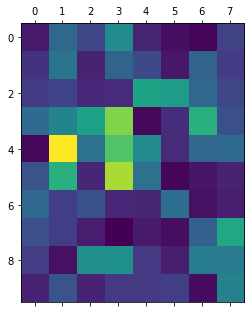

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


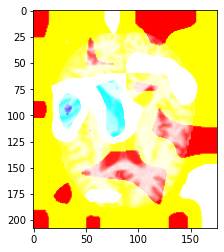

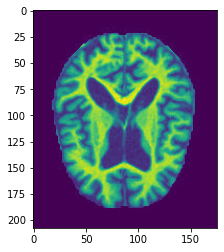

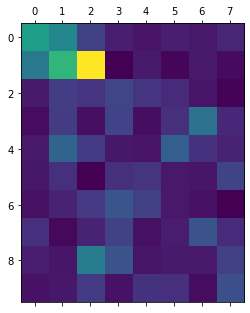

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


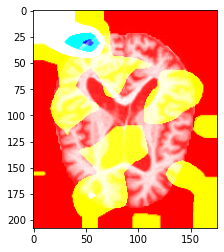

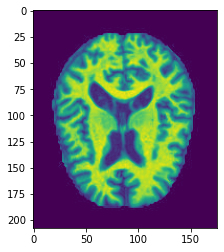

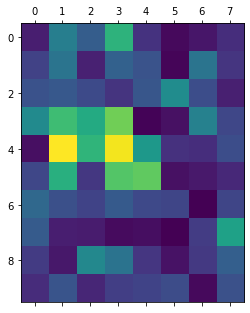

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


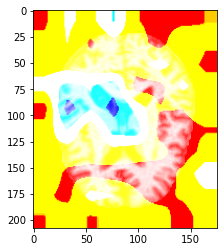

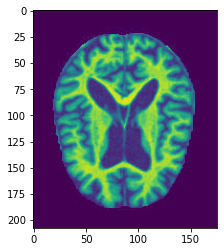

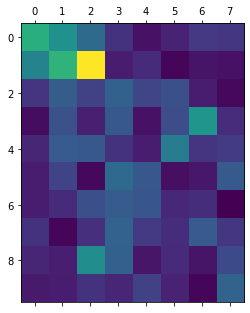

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


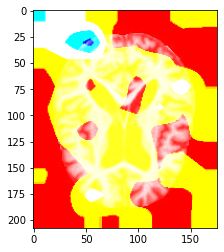

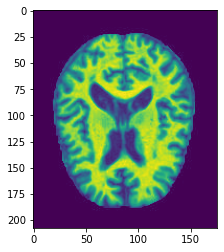

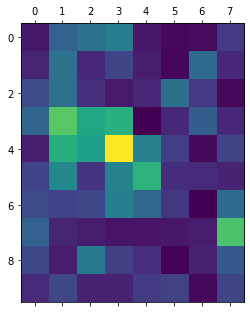

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


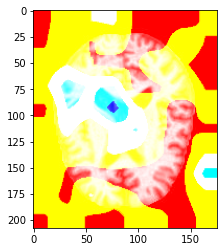

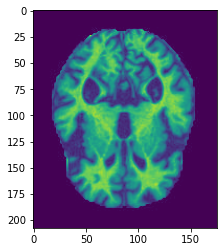

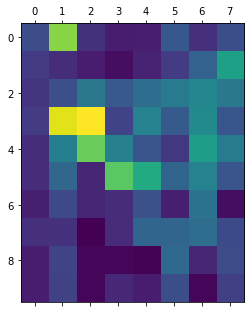

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


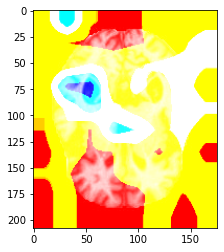

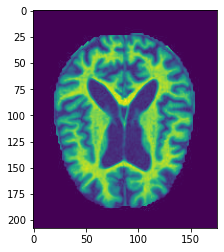

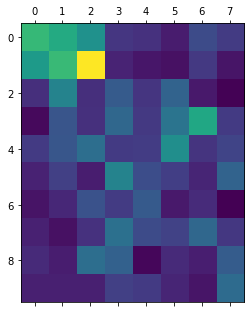

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


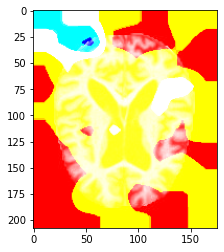

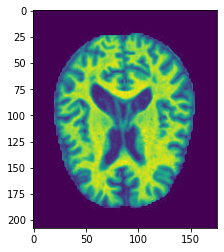

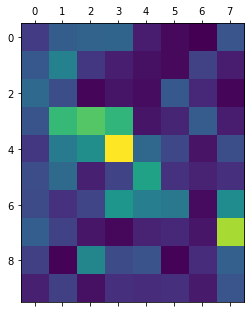

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


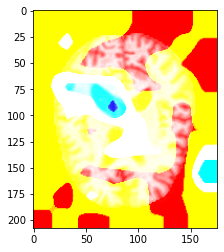

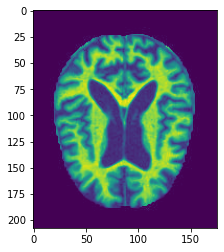

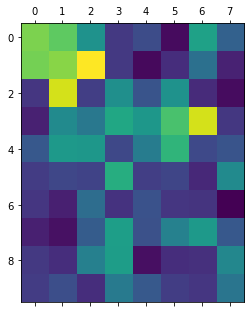

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


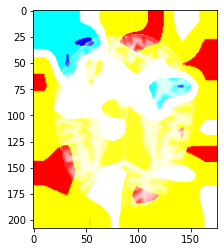

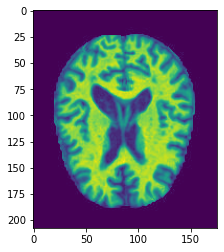

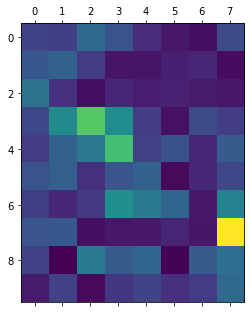

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


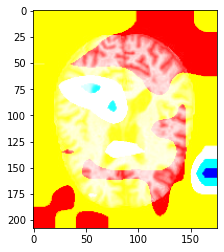

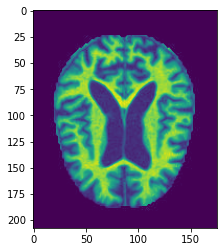

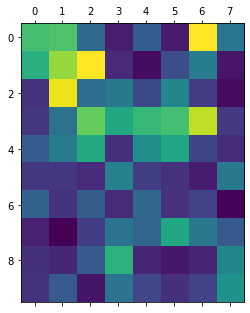

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


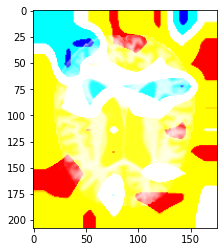

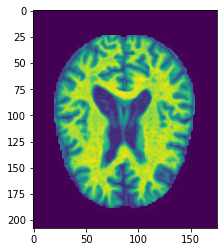

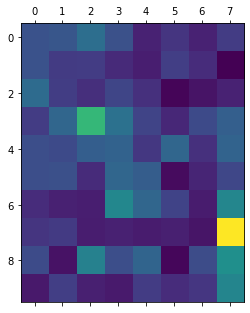

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


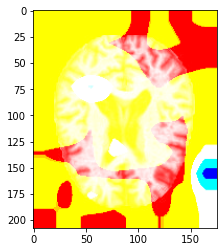

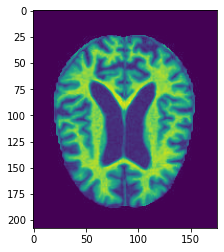

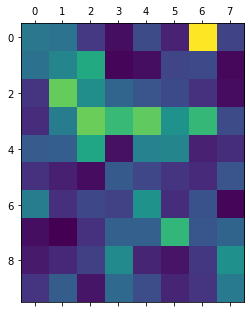

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


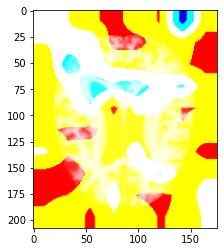

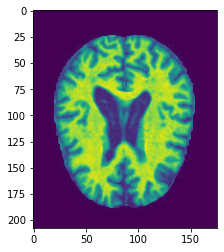

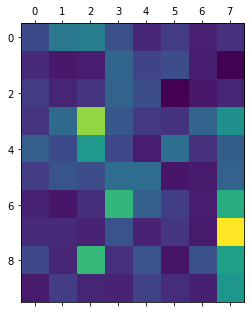

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


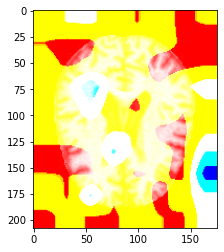

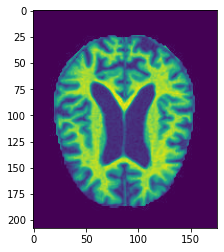

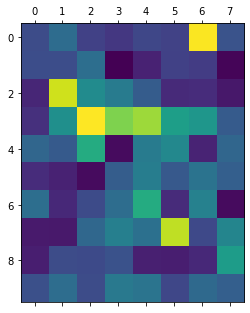

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


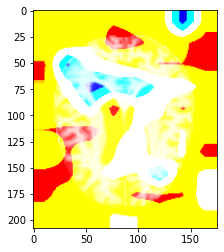

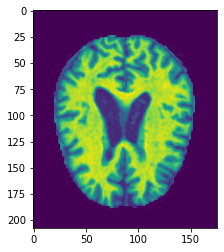

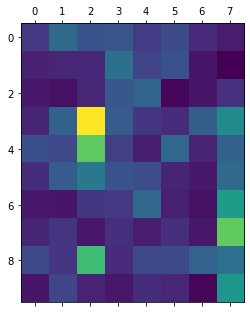

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


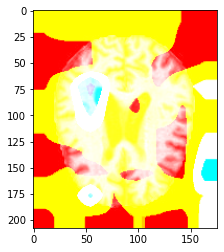

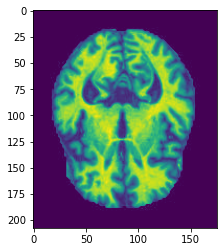

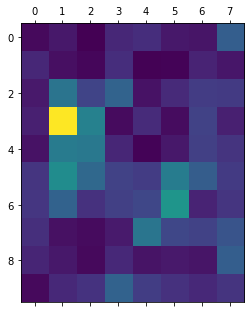

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


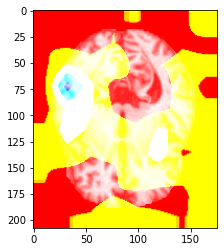

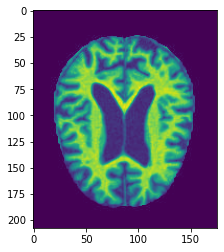

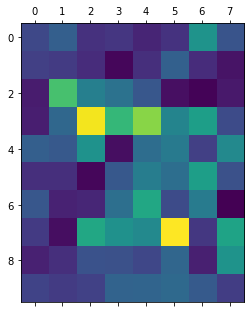

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


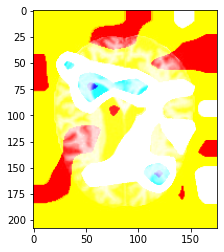

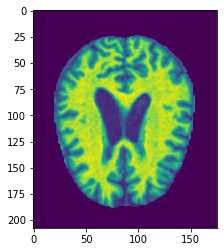

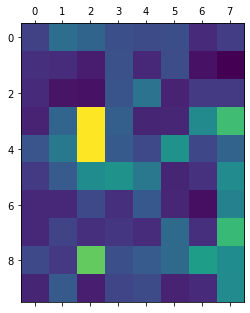

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


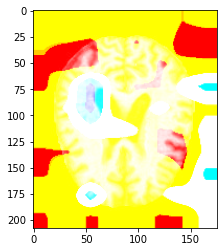

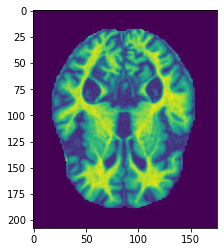

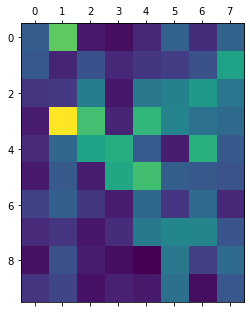

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


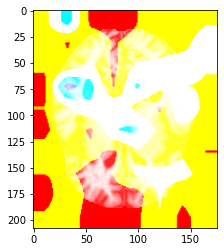

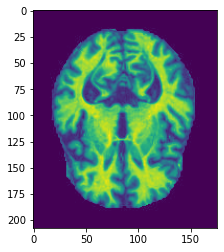

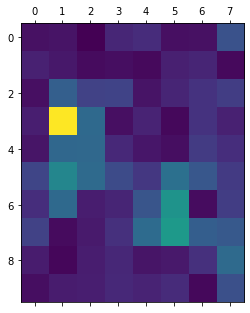

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


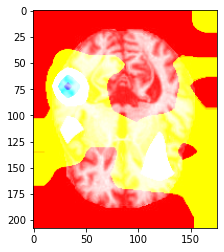

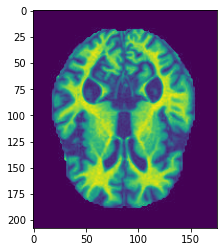

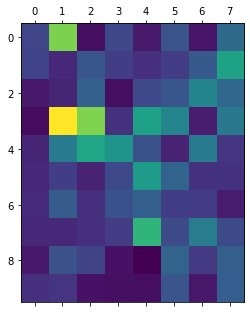

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


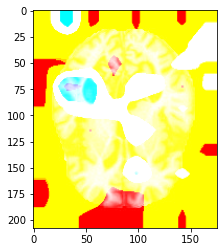

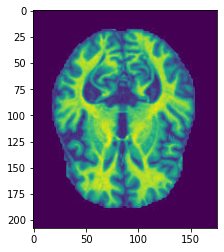

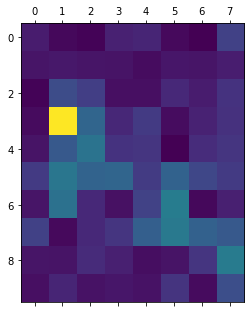

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


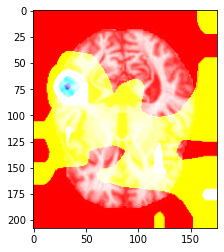

In [144]:
# Show heatmap for image
# show_heatmap takes a file path as a parameter
for file in list:
    n_path=os.path.join(path+file)
    overall_result=show_heatmap(n_path)

In [148]:
overall_result

[array([[[41.6,  0. ,  0. ],
         [41.6,  0. ,  0. ],
         [41.6,  0. ,  0. ],
         ...,
         [51. , 15.2,  0. ],
         [51. , 15.2,  0. ],
         [51. , 15.2,  0. ]],
 
        [[41.6,  0. ,  0. ],
         [41.6,  0. ,  0. ],
         [41.6,  0. ,  0. ],
         ...,
         [51. , 15.2,  0. ],
         [51. , 15.2,  0. ],
         [51. , 15.2,  0. ]],
 
        [[41.6,  0. ,  0. ],
         [41.6,  0. ,  0. ],
         [41.6,  0. ,  0. ],
         ...,
         [51. , 15.2,  0. ],
         [51. , 15.2,  0. ],
         [51. , 15.2,  0. ]],
 
        ...,
 
        [[34.4,  0. ,  0. ],
         [34.4,  0. ,  0. ],
         [34.4,  0. ,  0. ],
         ...,
         [51. , 24. ,  0. ],
         [51. , 24. ,  0. ],
         [51. , 24. ,  0. ]],
 
        [[34.4,  0. ,  0. ],
         [34.4,  0. ,  0. ],
         [34.4,  0. ,  0. ],
         ...,
         [51. , 24. ,  0. ],
         [51. , 24. ,  0. ],
         [51. , 24. ,  0. ]],
 
        [[34.4,  0. ,  0. ],
 

In [145]:
mean_result=np.mean(overall_result)
mean_result.shape

()

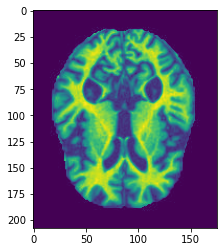

In [105]:
file_path='./dataset/train/ModerateDemented/moderateDem10.jpg'
img = imread(file_path, as_=True)
#cv2.imshow('input', cv2.imread(file_path)) # Visualize image
img = img.astype('float32')
img /= 255
x = image.img_to_array(img)
x=np.reshape(x, (208, 176, 1))
plt.imshow(x, cmap='gray')

In [108]:
img.shape

(208, 176)

In [36]:
last_conv_layer = model.get_layer('conv2d_5')
heatmap_model= Model([model.inputs], [last_conv_layer.output, model.output])

In [45]:
with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('conv2d_5')
        iterate = Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = keras.backend.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply((pooled_grads+0.01), last_conv_layer), axis=-1)

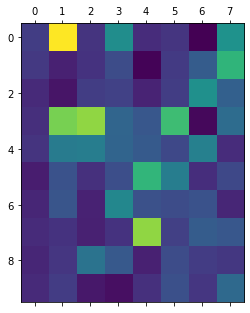

In [47]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((10, 8))
plt.matshow(heatmap)
plt.show()

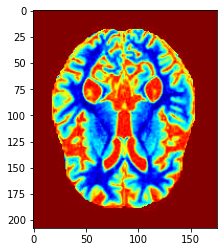

In [84]:
t=cv2.applyColorMap(np.uint8(255*x), cv2.COLORMAP_JET)
plt.imshow(t)

In [98]:
INTENSITY = 0.001
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
img = heatmap * INTENSITY + x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


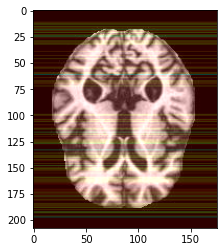

In [99]:
plt.imshow(img)

In [ ]:
file_path='./dataset/train/ModerateDemented/moderateDem17.jpg'
img = imread(file_path, as_gray=True)
cv2.imshow('input', cv2.imread(file_path)) # Visualize image
img = img.astype('float32')
img /= 255
x = image.img_to_array(img)
x=np.reshape(x, (1, 208, 176, 1))
preds = model.predict(x)
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('conv2d_5')
    iterate = Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = keras.backend.mean(grads, axis=(0, 1, 2))
  
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((10, 8))
  plt.matshow(heatmap)
  plt.show()

  img = cv2.imread(file_path)
  INTENSITY = 0.5
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
  img = heatmap * INTENSITY + img

  cv2.imshow('output',img)
